In [1]:
import ehc_sn as ehc
import matplotlib.pyplot as plt
import numpy as np

In [2]:
! python main.py --map="example" --output-file="episode_example"

pygame 2.6.1 (SDL 2.28.4, Python 3.12.8)
Hello from the pygame community. https://www.pygame.org/contribute.html
INFO:__main__:Getting map environment: example
INFO:__main__:Starting manual control
pressed right
step=1, reward=0.00
pressed up
step=2, reward=0.00
pressed left
step=3, reward=0.00
pressed up
step=4, reward=0.00
pressed right
step=5, reward=0.00
pressed up
step=6, reward=0.00
pressed left
step=7, reward=0.00
pressed up
step=8, reward=0.00
pressed right
step=9, reward=0.00
pressed up
step=10, reward=0.00
pressed up
step=11, reward=0.00
pressed up
step=12, reward=0.00
pressed up
step=13, reward=0.00
pressed left
step=14, reward=0.00
pressed up
step=15, reward=0.00
pressed right
step=16, reward=0.00
pressed up
step=17, reward=0.00
pressed up
step=18, reward=0.00
pressed left
step=19, reward=0.00
pressed up
step=20, reward=0.00
pressed up
step=21, reward=0.00
pressed left
step=22, reward=0.00
pressed up
step=23, reward=0.00
pressed up
step=24, reward=0.00
pressed right
step=25

In [3]:
episodes = np.load("data/episode_example.npy", allow_pickle=True)
episodes.shape

(3,)

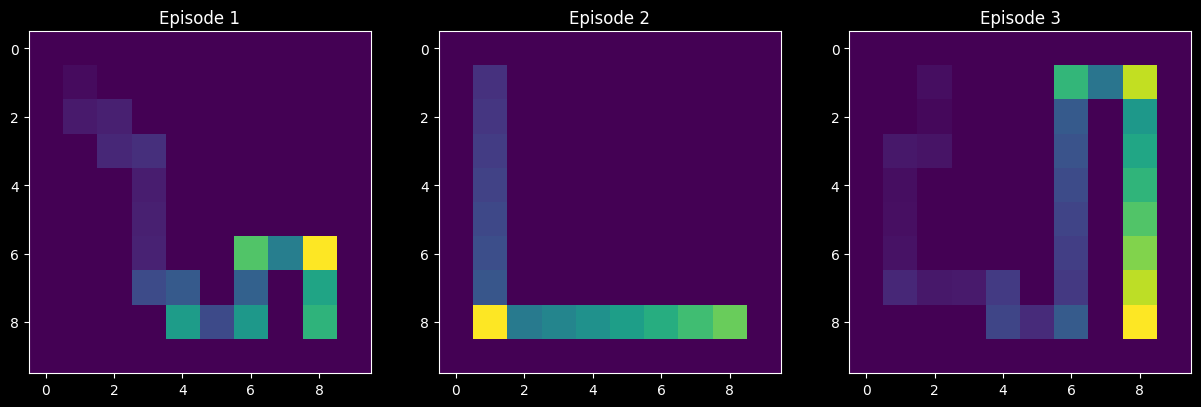

In [5]:
plt.figure(figsize=(15, 5))
for n, episode in enumerate(episodes):
    plt.subplot(1, len(episodes), n + 1)
    y = ehc.get_trajectory(episode, δ=0.9)
    plt.imshow(y.T, cmap="viridis")
    plt.title(f"Episode {n+1}")
plt.show()

In [6]:
parameters = ehc.HGModelParams(δ=0.8, τ=0.9, c=0.4)
model = ehc.HierarchicalGenerativeModel([1.0], 100, parameters)

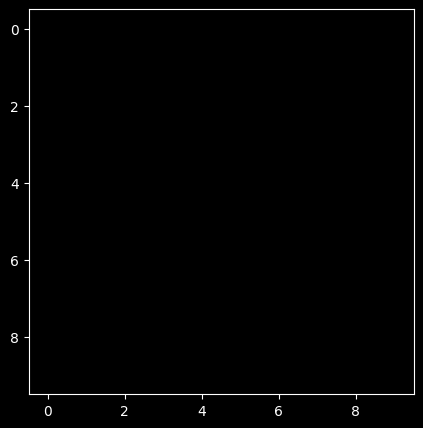

In [20]:
Θ = model.learning(episode=[e.reshape(e.shape[0], -1) for e in episodes])

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(Θ[0].θ.reshape(10, 10), cmap="viridis")